In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits,load_iris
%matplotlib inline
digits = load_digits()

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

In [21]:
digits.target_names.shape

(10,)

In [19]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [12]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [22]:
df['target'] = digits.target

In [23]:
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [24]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [29]:
df[df.target==3].head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
13,0.0,2.0,9.0,15.0,14.0,9.0,3.0,0.0,0.0,4.0,...,0.0,0.0,2.0,12.0,12.0,13.0,11.0,0.0,0.0,3
23,0.0,1.0,8.0,12.0,15.0,14.0,4.0,0.0,0.0,3.0,...,0.0,0.0,0.0,14.0,15.0,11.0,2.0,0.0,0.0,3
45,0.0,0.0,9.0,16.0,13.0,6.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,14.0,12.0,8.0,0.0,0.0,3
59,0.0,1.0,10.0,15.0,11.0,1.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,13.0,16.0,15.0,10.0,0.0,0.0,3


In [30]:
df['digit_names'] = df.target.apply(lambda x: digits.target_names[x])

In [31]:
df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,digit_names
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9,9


In [32]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]
df3 = df[df.target==3]
df4 = df[df.target==4]
df5 = df[df.target==5]
df6 = df[df.target==6]
df7 = df[df.target==7]
df8 = df[df.target==8]
df9 = df[df.target==9]


In [33]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,target,digit_names
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1,1
11,0.0,0.0,0.0,0.0,14.0,13.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,13.0,16.0,1.0,0.0,1,1
21,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1,1
42,0.0,0.0,0.0,0.0,12.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,16.0,8.0,0.0,0.0,1,1
47,0.0,0.0,0.0,1.0,11.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,6.0,0.0,0.0,1,1


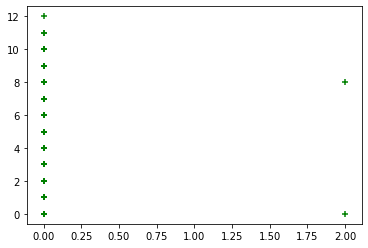

In [41]:
plt.scatter(df0[1],df0[2],color='green',marker='+')

In [39]:
len(df3)

183

In [42]:
X = df.drop(['target','digit_names'],axis='columns')

In [43]:
y = df.target
y

0       0
1       1
2       2
3       3
4       4
       ..
1792    9
1793    0
1794    8
1795    9
1796    8
Name: target, Length: 1797, dtype: int32

In [44]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [47]:
len(X_train)

1437

In [56]:
model = SVC(kernel='linear')

In [57]:
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
model.score(X_test,y_test)

0.975